# LAB: Internet of Vehicles (IoV) network packet analysis
The CICIoV 2024 dataset as proposed by *E. C. P. Neto, H. Taslimasa, S. Dadkhah, S. Iqbal, P. Xiong, T. Rahmanb, and A. A. Ghorbani, "CICIoV2024: Advancing Realistic IDS Approaches against DoS and Spoofing Attack in IoV CAN bus," Internet of Things, 101209, 2024.* contains a variety of labeled network traffic data capturing both normal and malicious activites within IoV environments. 

![IoV Dataset 2024](https://www.unb.ca/cic/_assets/images/inline-iov-data-2024-1.jpg)

### Imports


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

### Load and concatenate dataset

In [3]:
df_benign = pd.read_csv('CICIoV2024/decimal/decimal_benign.csv')
df_benign.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,65,1068,535,131,936,359,369,516,609,1071
DATA_0,96,132,127,15,1,0,16,192,0,125
DATA_1,0,13,255,224,0,128,108,0,0,4
DATA_2,0,160,127,0,39,0,0,125,9,0
DATA_3,0,0,255,0,16,0,0,0,0,2
DATA_4,0,0,127,0,0,0,0,0,0,113
DATA_5,0,0,255,0,0,1,0,0,0,0
DATA_6,0,0,127,0,0,227,0,0,0,0
DATA_7,0,0,255,0,0,0,0,0,0,0
label,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN


In [5]:
df_benign.shape

(1223737, 12)

In [7]:
df_dos = pd.read_csv('CICIoV2024/decimal/decimal_DoS.csv')
df_dos.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,291,291,291,291,291,291,291,291,291,291
DATA_0,0,14,14,14,14,14,14,14,14,14
DATA_1,0,11,11,11,11,11,11,11,11,11
DATA_2,0,4,4,4,4,4,4,4,4,4
DATA_3,0,4,4,4,4,4,4,4,4,4
DATA_4,0,3,3,3,3,3,3,3,3,3
DATA_5,0,3,3,3,3,3,3,3,3,3
DATA_6,0,8,8,8,8,8,8,8,8,8
DATA_7,0,12,12,12,12,12,12,12,12,12
label,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK


In [9]:
df_dos.shape

(74663, 12)

In [11]:
df_spoofing_gas = pd.read_csv('CICIoV2024/decimal/decimal_spoofing-GAS.csv')
df_spoofing_rpm = pd.read_csv('CICIoV2024/decimal/decimal_spoofing-RPM.csv')
df_spoofing_speed = pd.read_csv('CICIoV2024/decimal/decimal_spoofing-SPEED.csv')
df_spoofing_steering = pd.read_csv('CICIoV2024/decimal/decimal_spoofing-STEERING_WHEEL.csv')

In [13]:
df = pd.concat([df_benign, df_dos, df_spoofing_gas, df_spoofing_rpm, df_spoofing_speed, df_spoofing_steering])

In [15]:
#df.shape
df.head(-10).T

,0,1,2,3,4,5,6,7,8,9,...,19957,19958,19959,19960,19961,19962,19963,19964,19965,19966
ID,65,1068,535,131,936,359,369,516,609,1071,...,128,128,128,128,128,128,128,128,128,128
DATA_0,96,132,127,15,1,0,16,192,0,125,...,132,132,132,132,132,132,132,132,132,132
DATA_1,0,13,255,224,0,128,108,0,0,4,...,3,3,3,3,3,3,3,3,3,3
DATA_2,0,160,127,0,39,0,0,125,9,0,...,2,2,2,2,2,2,2,2,2,2
DATA_3,0,0,255,0,16,0,0,0,0,2,...,35,35,35,35,35,35,35,35,35,35
DATA_4,0,0,127,0,0,0,0,0,0,113,...,24,24,24,24,24,24,24,24,24,24
DATA_5,0,0,255,0,0,1,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
DATA_6,0,0,127,0,0,227,0,0,0,0,...,138,138,138,138,138,138,138,138,138,138
DATA_7,0,0,255,0,0,0,0,0,0,0,...,34,34,34,34,34,34,34,34,34,34
label,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,BENIGN,...,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK,ATTACK


### Two-class classification

#### Data Preprocessing and cleaning

- Drop specific_class and category
- Create a feature column list and a variable containing the class column
- Use a LabelEncoder to transform labels to numerical

In [207]:
df_combined = df.drop(columns=['category','specific_class'])
df_combined = df_combined.drop(columns=['ID'])
df_combined = df_combined.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=22))

In [209]:
df_combined['label'].value_counts()

label
BENIGN    244747
ATTACK     36896
Name: count, dtype: int64

In [211]:
Y_col = 'label'
X_cols = df_combined.loc[:, df_combined.columns != Y_col].columns

In [213]:
le = LabelEncoder()
df_combined[Y_col] = le.fit_transform(df_combined[Y_col])
le.classes_

array(['ATTACK', 'BENIGN'], dtype=object)

In [215]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_combined[X_cols], df_combined[Y_col], test_size=0.2, random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=22)

In [217]:
X_train.dtypes

DATA_0    int64
DATA_1    int64
DATA_2    int64
DATA_3    int64
DATA_4    int64
DATA_5    int64
DATA_6    int64
DATA_7    int64
dtype: object

In [219]:
y_train.unique()

array([1, 0])

#### ML models

In [221]:
models = [
    SVC(),
    xgb.XGBClassifier(random_state=22, max_iter=300),
    LogisticRegression(),
    AdaBoostClassifier(n_estimators=2000),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=100, max_features='log2'),
    DecisionTreeClassifier(max_depth=10),
    GradientBoostingClassifier(n_estimators=2000),
    HistGradientBoostingClassifier(max_iter=100),
]

In [223]:
best_model = None
best_acc = None
best_loss = None
for clf in models:
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_val)

    acc = round(accuracy_score(y_val, y_pred) * 100,4)
    mse = round(mean_squared_error(y_val, y_pred), 5)
    cnf = confusion_matrix(y_val,y_pred)
    print(f"{clf.__class__.__name__:30}: Accuraccy: {acc:7} %, MSE: {mse:7} FP|FN: {cnf[0][1]:2}|{cnf[1][0]:2}")

    if best_loss != None:
        if best_loss > mse:
            best_model = clf
            best_acc = acc
            best_loss = mse
    else:
        best_model = clf
        best_acc = round(acc, 4)
        best_loss = round(mse, 5)

print("-"*92)
print(f"{best_model.__class__.__name__:30}: Accuraccy: {acc:7} %, MSE: {best_loss:7}")

SVC                           : Accuraccy: 98.9171 %, MSE: 0.01083 FP|FN: 409|79
XGBClassifier                 : Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
LogisticRegression            : Accuraccy:  87.178 %, MSE: 0.12822 FP|FN: 5645|133
AdaBoostClassifier            : Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
KNeighborsClassifier          : Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
RandomForestClassifier        : Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
DecisionTreeClassifier        : Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
GradientBoostingClassifier    : Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
HistGradientBoostingClassifier: Accuraccy:   100.0 %, MSE:     0.0 FP|FN:  0| 0
--------------------------------------------------------------------------------------------
XGBClassifier                 : Accuraccy:   100.0 %, MSE:     0.0


In [226]:
y_pred = best_model.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) * 100,4)
mse = round(mean_squared_error(y_test, y_pred), 5)
cnf = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {acc}, FP|FN: {cnf[0][1]} | {cnf[1][0]}")

Accuracy: 99.0041, FP|FN: 498 | 63


### Multiclass classification (Class)

#### Data Preprocessing and cleaning

- Drop label and category
- Create a feature column list and a variable containing the class column
- Use a LabelEncoder to transform labels to numerical

In [227]:
df_combined = df.drop(columns=['label','category'])
df_combined = df_combined.drop(columns=['ID'])
df_combined = df_combined.groupby('specific_class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=22))

In [232]:
df_combined['specific_class'].value_counts()

specific_class
BENIGN            244747
DoS                14933
RPM                10980
SPEED               4990
STEERING_WHEEL      3995
GAS                 1998
Name: count, dtype: int64

In [234]:
Y_col = 'specific_class'
X_cols = df_combined.loc[:, df_combined.columns != Y_col].columns

In [236]:
le = LabelEncoder()
df_combined[Y_col] = le.fit_transform(df_combined[Y_col])
le.classes_

array(['BENIGN', 'DoS', 'GAS', 'RPM', 'SPEED', 'STEERING_WHEEL'],
      dtype=object)

In [238]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_combined[X_cols], df_combined[Y_col], test_size=0.2, random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=22)

In [244]:
y_train.unique()

array([0, 3, 5, 1, 2, 4])

#### ML models

In [260]:
models = [
    xgb.XGBClassifier(random_state=22, max_iter=200),
    LogisticRegression(),
    AdaBoostClassifier(n_estimators=500),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=100, max_features='log2'),
    DecisionTreeClassifier(max_depth=10),
    GradientBoostingClassifier(n_estimators=500),
    HistGradientBoostingClassifier(max_iter=100),
]

In [262]:
best_model = None
best_acc = None
best_loss = None
for clf in models:
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_val)

    acc = round(accuracy_score(y_val, y_pred) * 100,4)
    mse = round(mean_squared_error(y_val, y_pred), 5)
    cnf = confusion_matrix(y_val,y_pred)
    print(f"{clf.__class__.__name__:30}: Accuraccy: {acc:7} %, MSE: {mse:7} FP|FN: {cnf[0][1]:2}|{cnf[1][0]:2}")

    if best_loss != None:
        if best_loss > mse:
            best_model = clf
            best_acc = acc
            best_loss = mse
    else:
        best_model = clf
        best_acc = round(acc, 4)
        best_loss = round(mse, 5)

print("-"*92)
print(f"{best_model.__class__.__name__:30}: Accuraccy: {acc:7} %, MSE: {best_loss:7}")

XGBClassifier                 : Accuraccy: 99.6694 %, MSE: 0.00331 FP|FN:  0| 0
LogisticRegression            : Accuraccy:  89.548 %, MSE: 0.66553 FP|FN:  0|2253
AdaBoostClassifier            : Accuraccy:  86.135 %, MSE: 0.90447 FP|FN: 637|236
KNeighborsClassifier          : Accuraccy: 99.6694 %, MSE: 0.00331 FP|FN:  0| 0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier        : Accuraccy: 99.6694 %, MSE: 0.00331 FP|FN:  0| 0
DecisionTreeClassifier        : Accuraccy: 99.6694 %, MSE: 0.00331 FP|FN:  0| 0
      Iter       Train Loss   Remaining Time 
         1           0.2763            1.93m
         2           0.2356            2.07m
         3           0.1997            2.16m
         4           0.1693            2.18m
         5           0.1456            2.29m
         6           0.1209            2.30m
         7           0.1053            2.26m
         8           0.0922            2.26m
         9           0.0811            2.26m
        10           0.0723            2.25m
        20           0.0266            2.25m
        30           0.0124            2.23m
        40           0.0079            2.16m
        50           0.0063            2.10m
        60           0.0056            2.05m
        70           0.0053            2.00m
        80           0.0052            1.95m
        90           0.0051  

In [263]:
y_pred = best_model.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) * 100,4)
mse = round(mean_squared_error(y_test, y_pred), 5)
cnf = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {acc}, FP|FN: {cnf[0][1]} | {cnf[1][0]}")

Accuracy: 99.6077, FP|FN: 0 | 0


<Axes: >

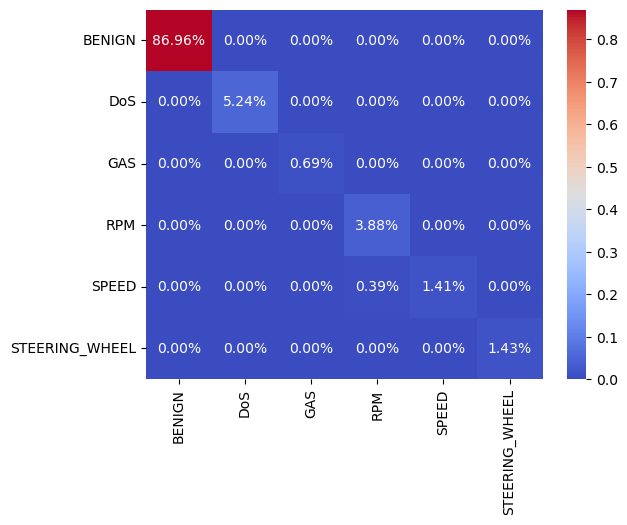

In [288]:
sns.heatmap(cnf/np.sum(cnf), annot=True, fmt='.2%', cmap=sns.color_palette("coolwarm", as_cmap=True), xticklabels=le.classes_, yticklabels=le.classes_)